In [1]:
import tensorflow as tf

from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
X_np = np.linspace(-2, 2, 100)
y_np = 10 + X_np * X_np + 50 + np.random.uniform(-.3, .3, (100,))

In [10]:
X = tf.constant(X_np)
y = tf.constant(y_np)

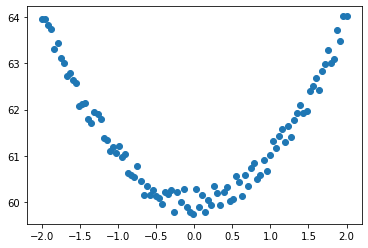

In [12]:
# #100 data points 
# NUM_EXAMPLES = 100

# #define inputs and outputs with some noise 
# X = tf.random.normal([NUM_EXAMPLES])  #inputs 
# noise = tf.random.normal([NUM_EXAMPLES]) #noise 
# y = X * 3 + 2 + noise  #true output

plt.scatter(X, y)

# Contruction Phase

In [13]:
#create model paramters with initial values 
W = tf.Variable(0., dtype=np.float64)
b = tf.Variable(0., dtype=np.float64)

In [14]:
#training info
train_steps = 300
learning_rate = 0.01

In [15]:

#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        yhat = X * X * W + b

        #calcuate the loss (difference squared error)
        error = yhat - y
        loss = tf.reduce_mean(error**2)

    #evalute the gradient with the respect to the paramters
    dW, db = tape.gradient(loss, [W, b])

    #update the paramters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db * learning_rate)

    return(loss)

In [20]:
#print the loss every 20 iterations
for i in range(train_steps):
    loss = train_on_batch(X,y)
    
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
        
        
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

Loss at step 000: 11.927
Loss at step 020: 8.840
Loss at step 040: 6.553
Loss at step 060: 4.860
Loss at step 080: 3.606
Loss at step 100: 2.678
Loss at step 120: 1.990
Loss at step 140: 1.481
Loss at step 160: 1.104
Loss at step 180: 0.824
Loss at step 200: 0.618
Loss at step 220: 0.464
Loss at step 240: 0.351
Loss at step 260: 0.267
Loss at step 280: 0.205
W : 1.264775220745778 , b  = 59.44735377622264 


In [21]:
loss = train_on_batch(X,y)

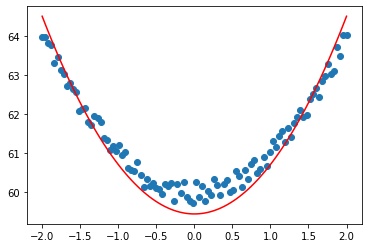

In [22]:
plt.scatter(X, y)
plt.plot(X, b + W*X*X, color='red')